# Import packages

In [1]:
import os
import cmaps
import cmocean
import numpy as np
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata
from netCDF4 import Dataset
from datetime import date
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import Polygon
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
rcParams['font.family'] = 'sans-serif'
directory   = '/srv/scratch/z3533156'

# Read mean KmKe and PeKe

In [2]:
dataset1   = sio.loadmat(directory+'/BRAN_WBC/SO/Figure2_mean.mat')
bran_lon   = dataset1['bran_lon'][:,:]
bran_lat   = dataset1['bran_lat'][:,:]
KmKe_mean  = dataset1['bran_KmKe_mean'][:,:]*1e4
PeKe_mean  = dataset1['bran_PeKe_mean'][:,:]*1e4

# Plot the spatial distribution of mean KmKe and PeKe

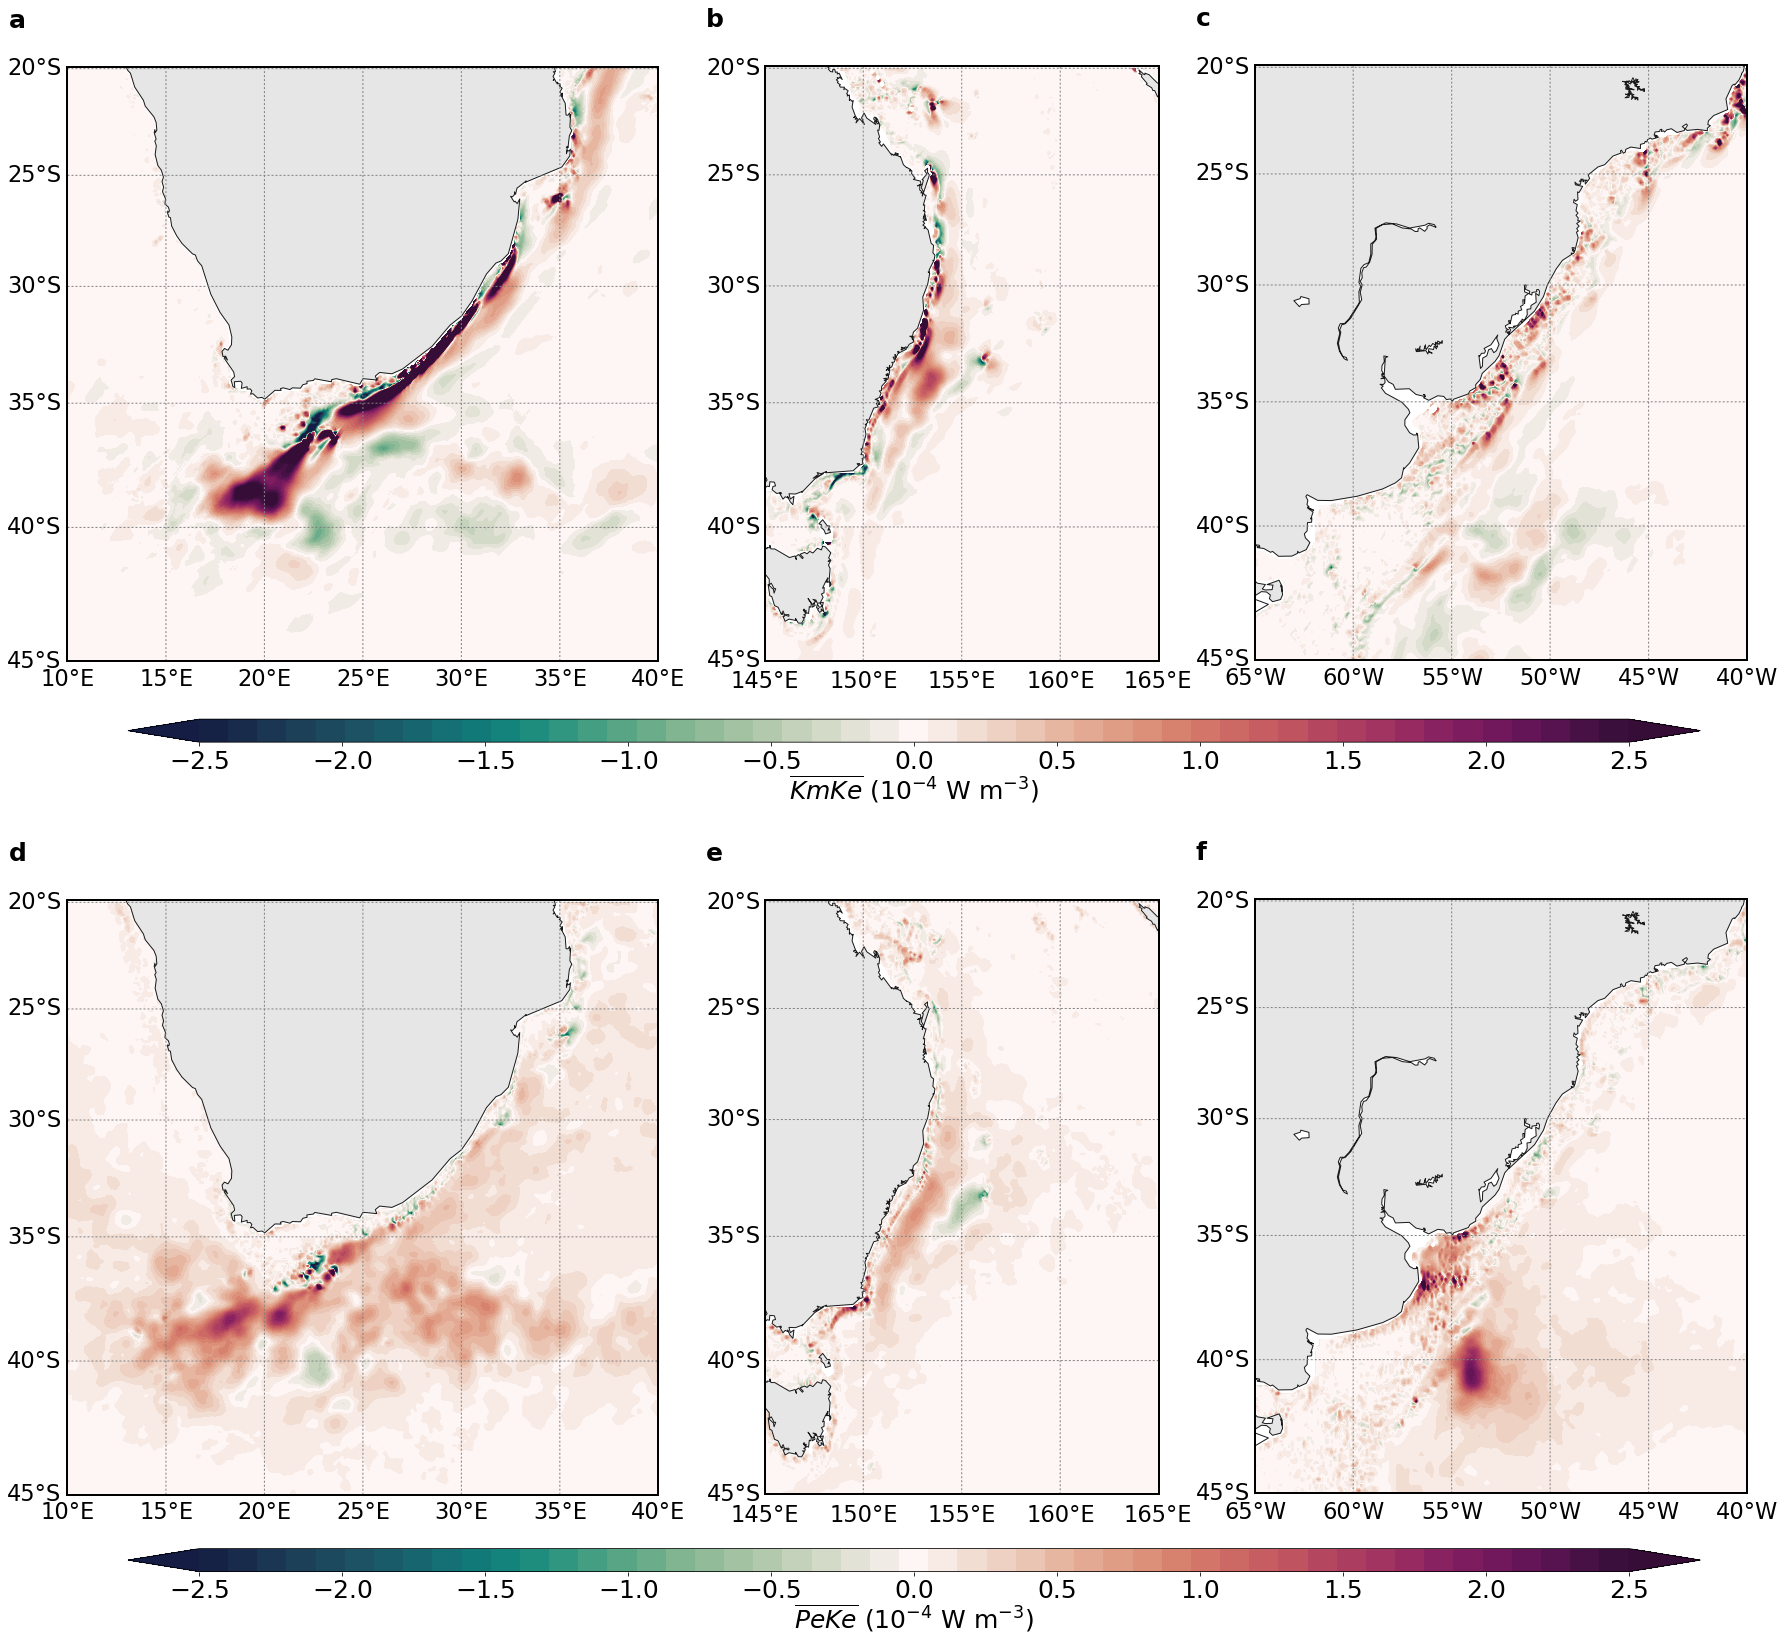

In [3]:
##############################################################################################################
labels      = ['a','b','c','d','e','f']
levels1     = np.linspace(-2.5,2.5,50)
tick_marks1 = np.linspace(-2.5,2.5,11) #[-2.5,-1.0,0,1.0,2.5] #
cmaps1      = cmaps.cmocean_curl
fig_ratio   = 0.9
fig         = plt.figure(figsize=(24, 32))
gs          = gridspec.GridSpec(2,3)
labelfont   = 25
padspacescale = 10
labelpadscale = 2
linefont    = 1
scale       = 1.0
m_scale     = 1   
##############################################################################################################
for i in range(6):
    if i==0: # AC: 0~50°E, 45°S~10°S
        lon       = bran_lon[1:500,150:505]      
        lat       = bran_lat[1:500,150:505]
        var_mean  = KmKe_mean[1:500,150:505]
    elif i==1:
        lon       = bran_lon[1449:1650,150:405]      
        lat       = bran_lat[1449:1650,150:405]  
        var_mean  = KmKe_mean[1449:1650,150:405]        
    elif i==2:
        lon       = bran_lon[2948:3200,100:405]      
        lat       = bran_lat[2948:3200,100:405]   
        var_mean  = KmKe_mean[2948:3200,100:405]
    elif i==3:
        lon       = bran_lon[1:500,150:505]      
        lat       = bran_lat[1:500,150:505]
        var_mean  = PeKe_mean[1:500,150:505]
    elif i==4:
        lon       = bran_lon[1449:1650,150:405]      
        lat       = bran_lat[1449:1650,150:405]  
        var_mean  = PeKe_mean[1449:1650,150:405]  
    else:
        lon       = bran_lon[2948:3200,100:405]      
        lat       = bran_lat[2948:3200,100:405]   
        var_mean  = PeKe_mean[2948:3200,100:405]
    ax = fig.add_subplot(gs[i])
    l, b, w, h = ax.get_position().bounds
    if np.mod(i,3)==0:     
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=10,urcrnrlon=40,resolution='l')    
        cx,cy  = m(7, -18.0)
    elif np.mod(i,3)==1:
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=145,urcrnrlon=np.nanmax(lon),resolution='l')    
        cx,cy  = m(142, -18.0)
        l=l+0.13
        b=b+0.086
    else:
        m   = Basemap(projection='merc',suppress_ticks=True,llcrnrlat=-45,urcrnrlat= -20+0.1,llcrnrlon=295,urcrnrlon=np.nanmax(lon),resolution='l')    
        cx,cy  = m(292, -18.0)
        b=b+0.0435
        l=l+0.14
    m.drawparallels(np.arange(-60,-0, 5),labels=[1,0,0,0],linewidth=linefont,dashes=[2,2],color='.5',fontsize=0.9*labelfont,family='sans-serif')    
    m.drawmeridians(np.arange(0,360, 5),labels=[0,0,0,1],linewidth=linefont,dashes=[2,2],color='.5',fontsize=0.9*labelfont,family='sans-serif')
    m.drawcoastlines(color='0.1',  linewidth=linefont)
    m.fillcontinents(color='0.9', lake_color='white') 
    x, y = m(lon, lat)
    if i<3:
        CB1=m.contourf(x, y, var_mean,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
    else:
        b=b+0.05
        CB2=m.contourf(x, y, var_mean,cmap=cmaps1,levels=levels1,origin='lower',extend='both')
    plt.text(cx, cy,labels[i],color='xkcd:black', fontsize=labelfont, weight='bold',family='sans-serif')
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    m.plot(x[0,:],  y[0,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,0],  y[:,0],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[-1,:], y[-1,:],linewidth=linefont, linestyle='solid', color='k')
    m.plot(x[:,-1], y[:,-1],linewidth=linefont, linestyle='solid', color='k')

    ax.spines['left'].set_linewidth(labelpadscale)
    ax.spines['top'].set_linewidth(labelpadscale)
    ax.spines['right'].set_linewidth(labelpadscale)
    ax.spines['bottom'].set_linewidth(labelpadscale)
    plt.tick_params(axis='x',which='major',bottom='on',left='on',top='on',right='on',\
                length=25,width=2,colors='black',direction='out')
    if np.mod(i,3)==0:
        ax.set_position([l, b, 1.5*scale*w, 1.5*scale*h])   
    elif np.mod(i,3)==1:
        ax.set_position([l, b, scale*w, scale*h])   
    else:
        ax.set_position([l, b, 1.25*scale*w, 1.25*scale*h]) 
        
cbaxes1     = fig.add_axes([0.16, 0.63, 0.91, 0.01])
cb1 = plt.colorbar(CB1,orientation='horizontal',cax = cbaxes1)
cb1.set_ticks(tick_marks1)
cb1.ax.tick_params(labelsize=labelfont)
cb1.set_label(r'$\overline{KmKe}$ (10$^{-4}$ W m$^{-3}$)', fontsize=labelfont,labelpad=0,family='sans-serif')

cbaxes2     = fig.add_axes([0.16, 0.27, 0.91, 0.01])
cb2 = plt.colorbar(CB2,orientation='horizontal',cax = cbaxes2)
cb2.set_ticks(tick_marks1)
cb2.ax.tick_params(labelsize=labelfont)
cb2.set_label(r'$\overline{PeKe}$ (10$^{-4}$ W m$^{-3}$)', fontsize=labelfont,labelpad=0,family='sans-serif')
fig.savefig(directory+'/BRAN_WBC/SO/FigureS3_kmke_peke.pdf',dpi=300,bbox_inches = 'tight')